<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/2348552_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


In [3]:
x = np.linspace(5, 10, 100)

In [10]:
def unit_step(x):
    return np.heaviside(x, 1)

def signum(x):
    return np.sign(x)

def linear(x):
    return x

def piecewise_linear(x):
    return np.where(x < 7.5, 0, x-5)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hyperbolic_tangent(x):
    return np.tanh(x)

neuron_values = {
    'Unit Step': unit_step(x),
    'Signum': signum(x),
    'Linear': linear(x),
    'Piece-wise Linear': piecewise_linear(x),
    'Sigmoid': sigmoid(x),
    'Hyperbolic Tangent': hyperbolic_tangent(x)
}

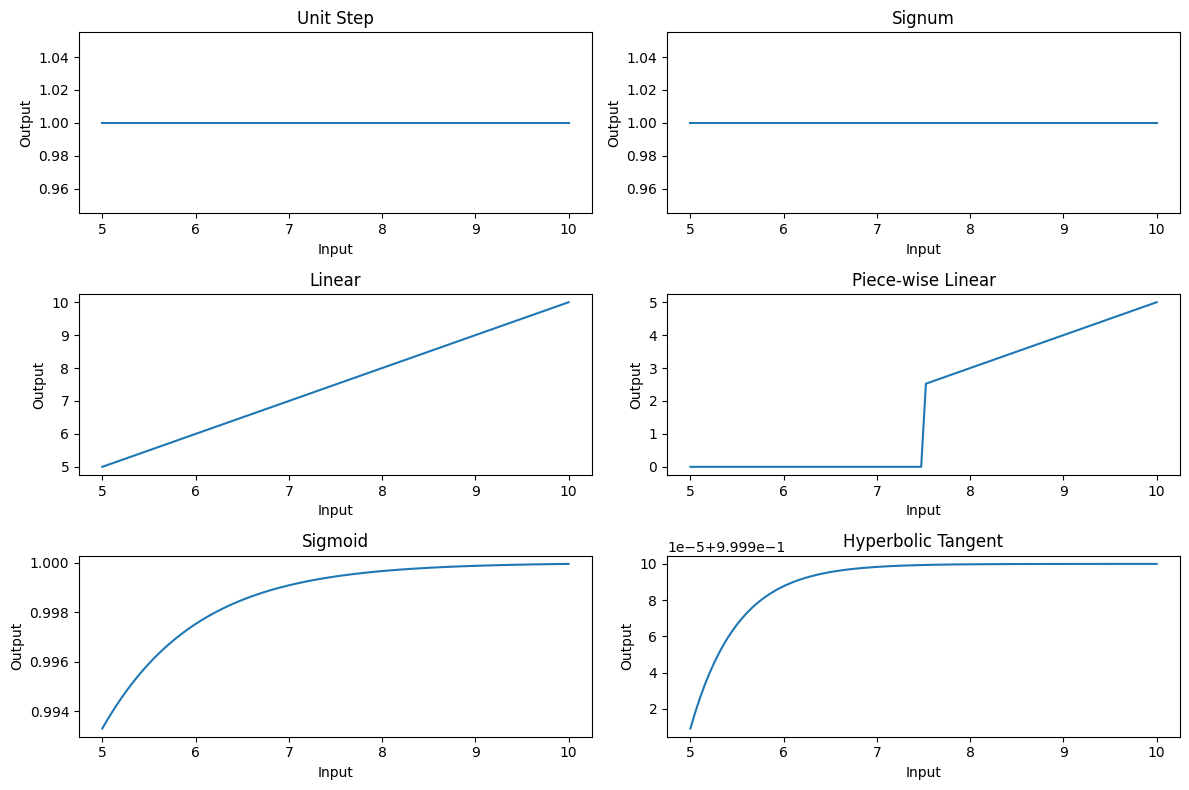

In [11]:
plt.figure(figsize=(12, 8))
for i, (activation, values) in enumerate(neuron_values.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(x, values)
    plt.title(activation)
    plt.xlabel('Input')
    plt.ylabel('Output')

plt.tight_layout()
plt.show()

Loading the Iris Dataset

In [14]:
iris = datasets.load_iris()
X = iris.data  # Input features
y = iris.target  # Target variable
z = X[:, 0]

In [15]:
def unit_step(z):
    return np.heaviside(z, 1)

def signum(z):
    return np.sign(z)

def linear(z):
    return z

def piecewise_linear(z):
    return np.where(z < np.mean(z), 0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hyperbolic_tangent(z):
    return np.tanh(z)

activation_functions = {
    'Unit Step': unit_step(z),
    'Signum': signum(z),
    'Linear': linear(z),
    'Piece-wise Linear': piecewise_linear(z),
    'Sigmoid': sigmoid(z),
    'Hyperbolic Tangent': hyperbolic_tangent(z)
}

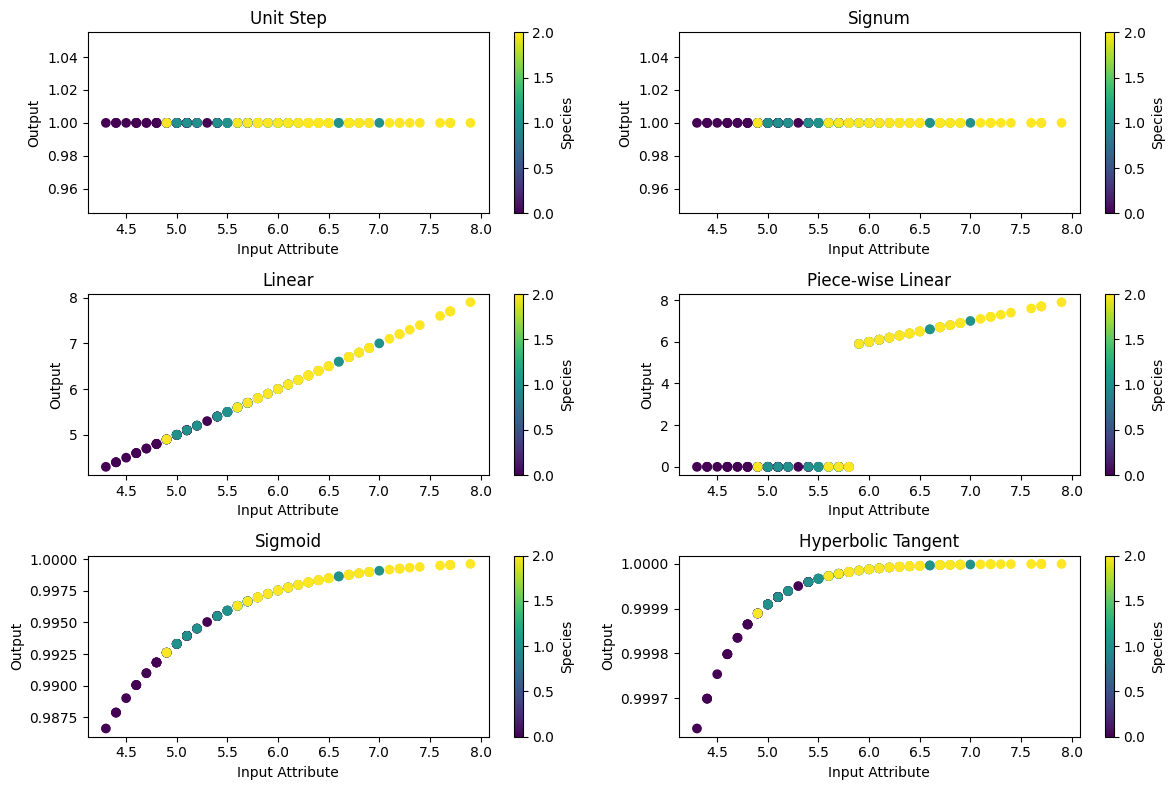

In [16]:
plt.figure(figsize=(12, 8))
for i, (activation, values) in enumerate(activation_functions.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(z, values, c=y, cmap='viridis')
    plt.title(activation)
    plt.xlabel('Input Attribute')
    plt.ylabel('Output')
    plt.colorbar(label='Species')

plt.tight_layout()
plt.show()

MLP Classifier

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [21]:
scores = cross_val_score(mlp, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [1.         1.         0.96666667 0.96666667 1.        ]
Average cross-validation score: 0.99


In [22]:
def perceptron(x1, x2, w1, w2, w0):
    net_input = x1*w1 + x2*w2 + w0
    return 1 if net_input >= 0 else 0

In [23]:
input_values = [(0, 0), (0, 1), (1, 0), (1, 1)]
w1 = 0.5
w2 = 0.243
w0 = 0.2

AND Function

In [24]:
print("AND Function:")
for x1, x2 in input_values:
    output = perceptron(x1, x2, w1, w2, w0)
    error = 0 if (output == x1 and output == x2) else 1
    print(f"Input: ({x1}, {x2}), Output: {output}, Error: {error}")

AND Function:
Input: (0, 0), Output: 1, Error: 1
Input: (0, 1), Output: 1, Error: 1
Input: (1, 0), Output: 1, Error: 1
Input: (1, 1), Output: 1, Error: 0


OR Function

In [25]:
print("\nOR Function:")
for x1, x2 in input_values:
    output = perceptron(x1, x2, w1, w2, w0)
    error = 0 if (output == 1) else 1
    print(f"Input: ({x1}, {x2}), Output: {output}, Error: {error}")



OR Function:
Input: (0, 0), Output: 1, Error: 0
Input: (0, 1), Output: 1, Error: 0
Input: (1, 0), Output: 1, Error: 0
Input: (1, 1), Output: 1, Error: 0


XOR Function

In [26]:
print("\nXOR Function:")
for x1, x2 in input_values:
    output = perceptron(x1, x2, w1, w2, w0)
    error = 0 if (output == (x1 ^ x2)) else 1
    print(f"Input: ({x1}, {x2}), Output: {output}, Error: {error}")


XOR Function:
Input: (0, 0), Output: 1, Error: 1
Input: (0, 1), Output: 1, Error: 0
Input: (1, 0), Output: 1, Error: 0
Input: (1, 1), Output: 1, Error: 1
